# Quantitative Experiments on Artificial Edges
- scatter plots showing hallucination score vs distortion
- scatter plots showing focus score vs distortion


comments: last used resnet18 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import cmocean
import seaborn as sns
import pandas as pd

sns.set(rc={"figure.dpi":250})

# Using seaborn's style
plt.style.use('seaborn-white')
# With LaTex fonts
tex_fonts = {
    # Use LaTeX to write all text
    #"text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams.update(tex_fonts)

In [6]:
data_waveletx = np.load('scatter_data/vgg19/data_waveletx.npy', allow_pickle=True)
data_pixelmask = np.load('scatter_data/vgg19/data_pixelmask.npy', allow_pickle=True)
data_shearletx = np.load(f'scatter_data/vgg19/data_shearletx.npy', allow_pickle=True)
data_smoothmask = np.load(f'scatter_data/vgg19/data_smoothmask.npy', allow_pickle=True)
a = 0.2
a_idx = 2
model_name = 'vgg19'
print(len(data_shearletx[0]['hallu-score']))

5


# Scatterplot

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


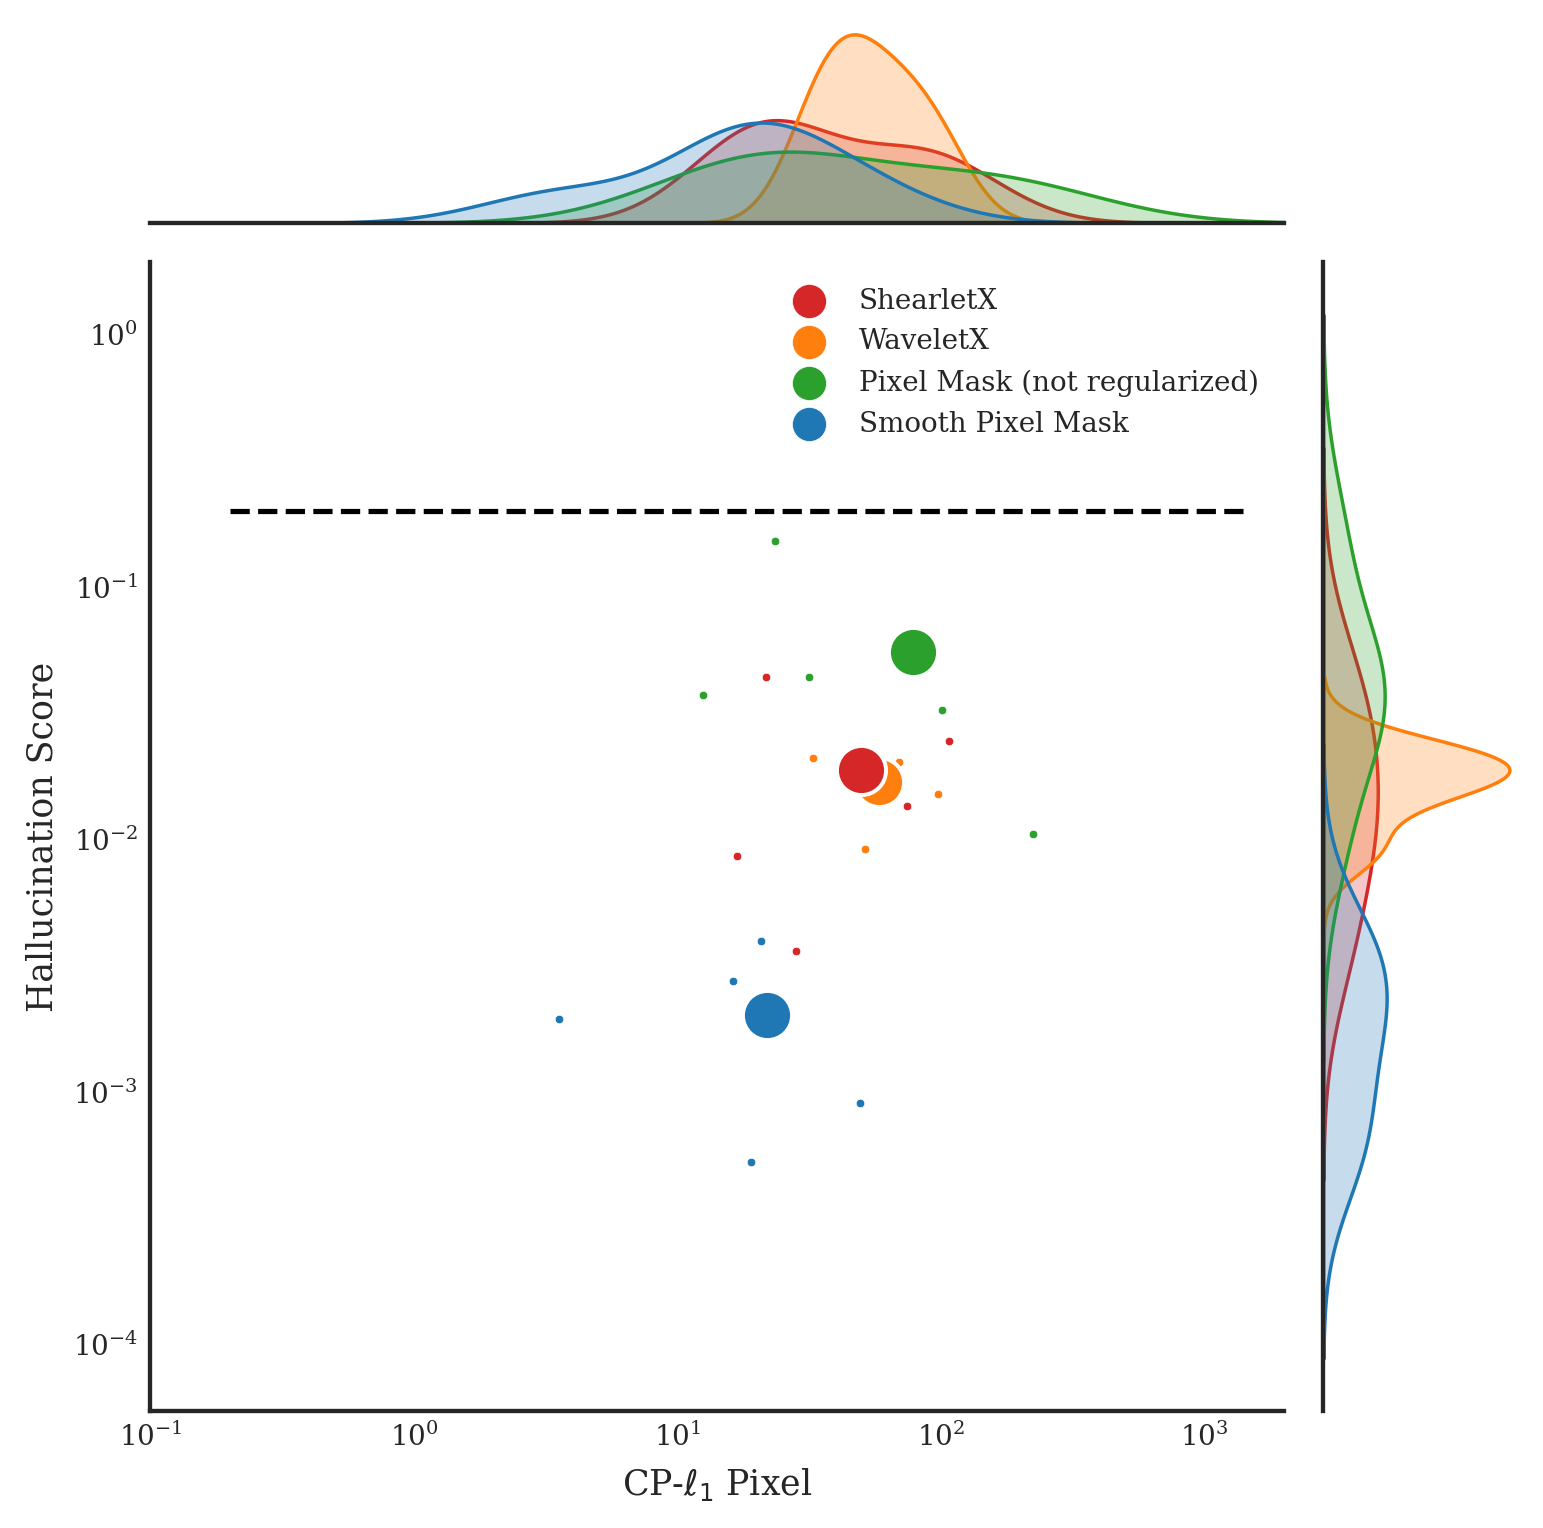

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


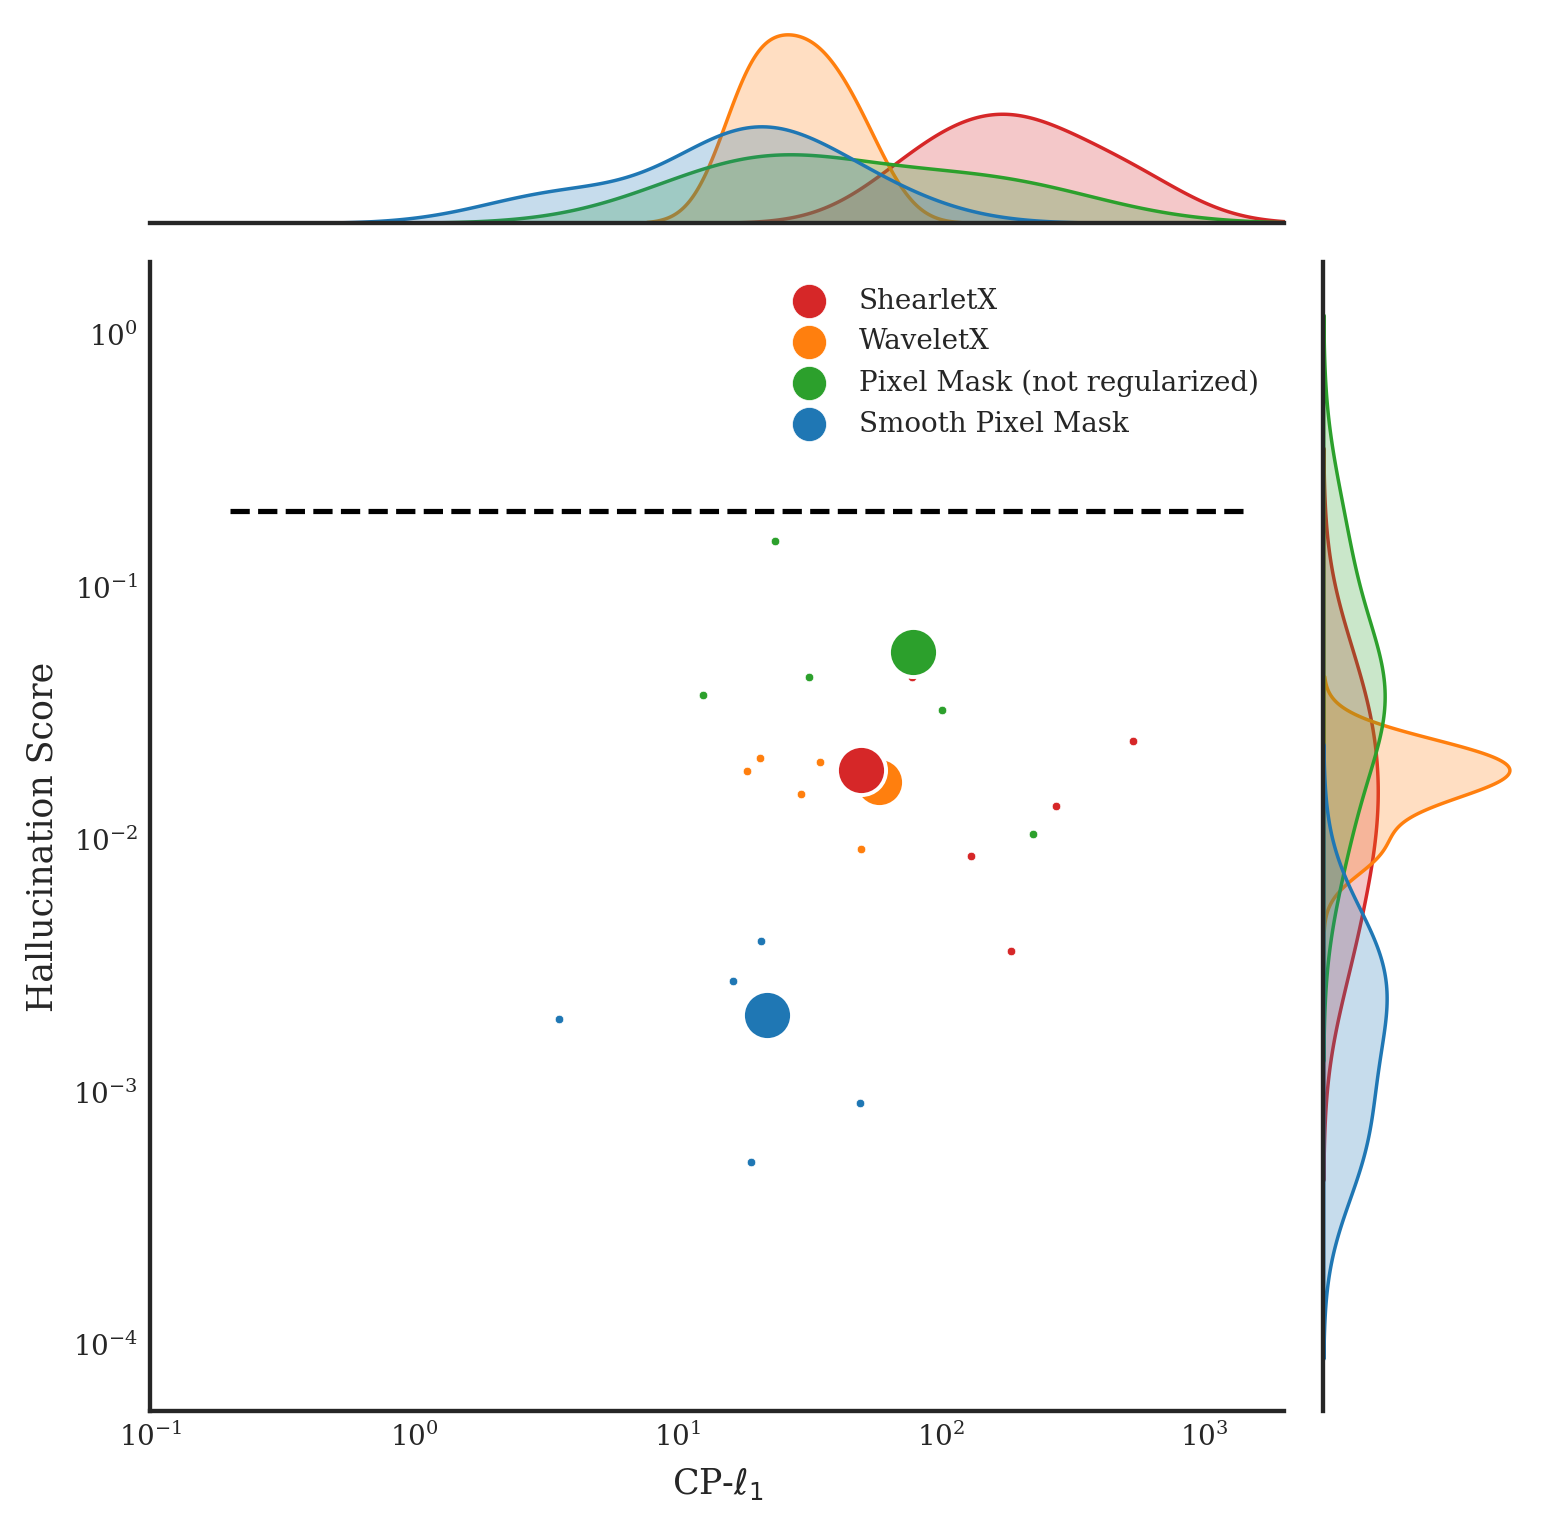

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


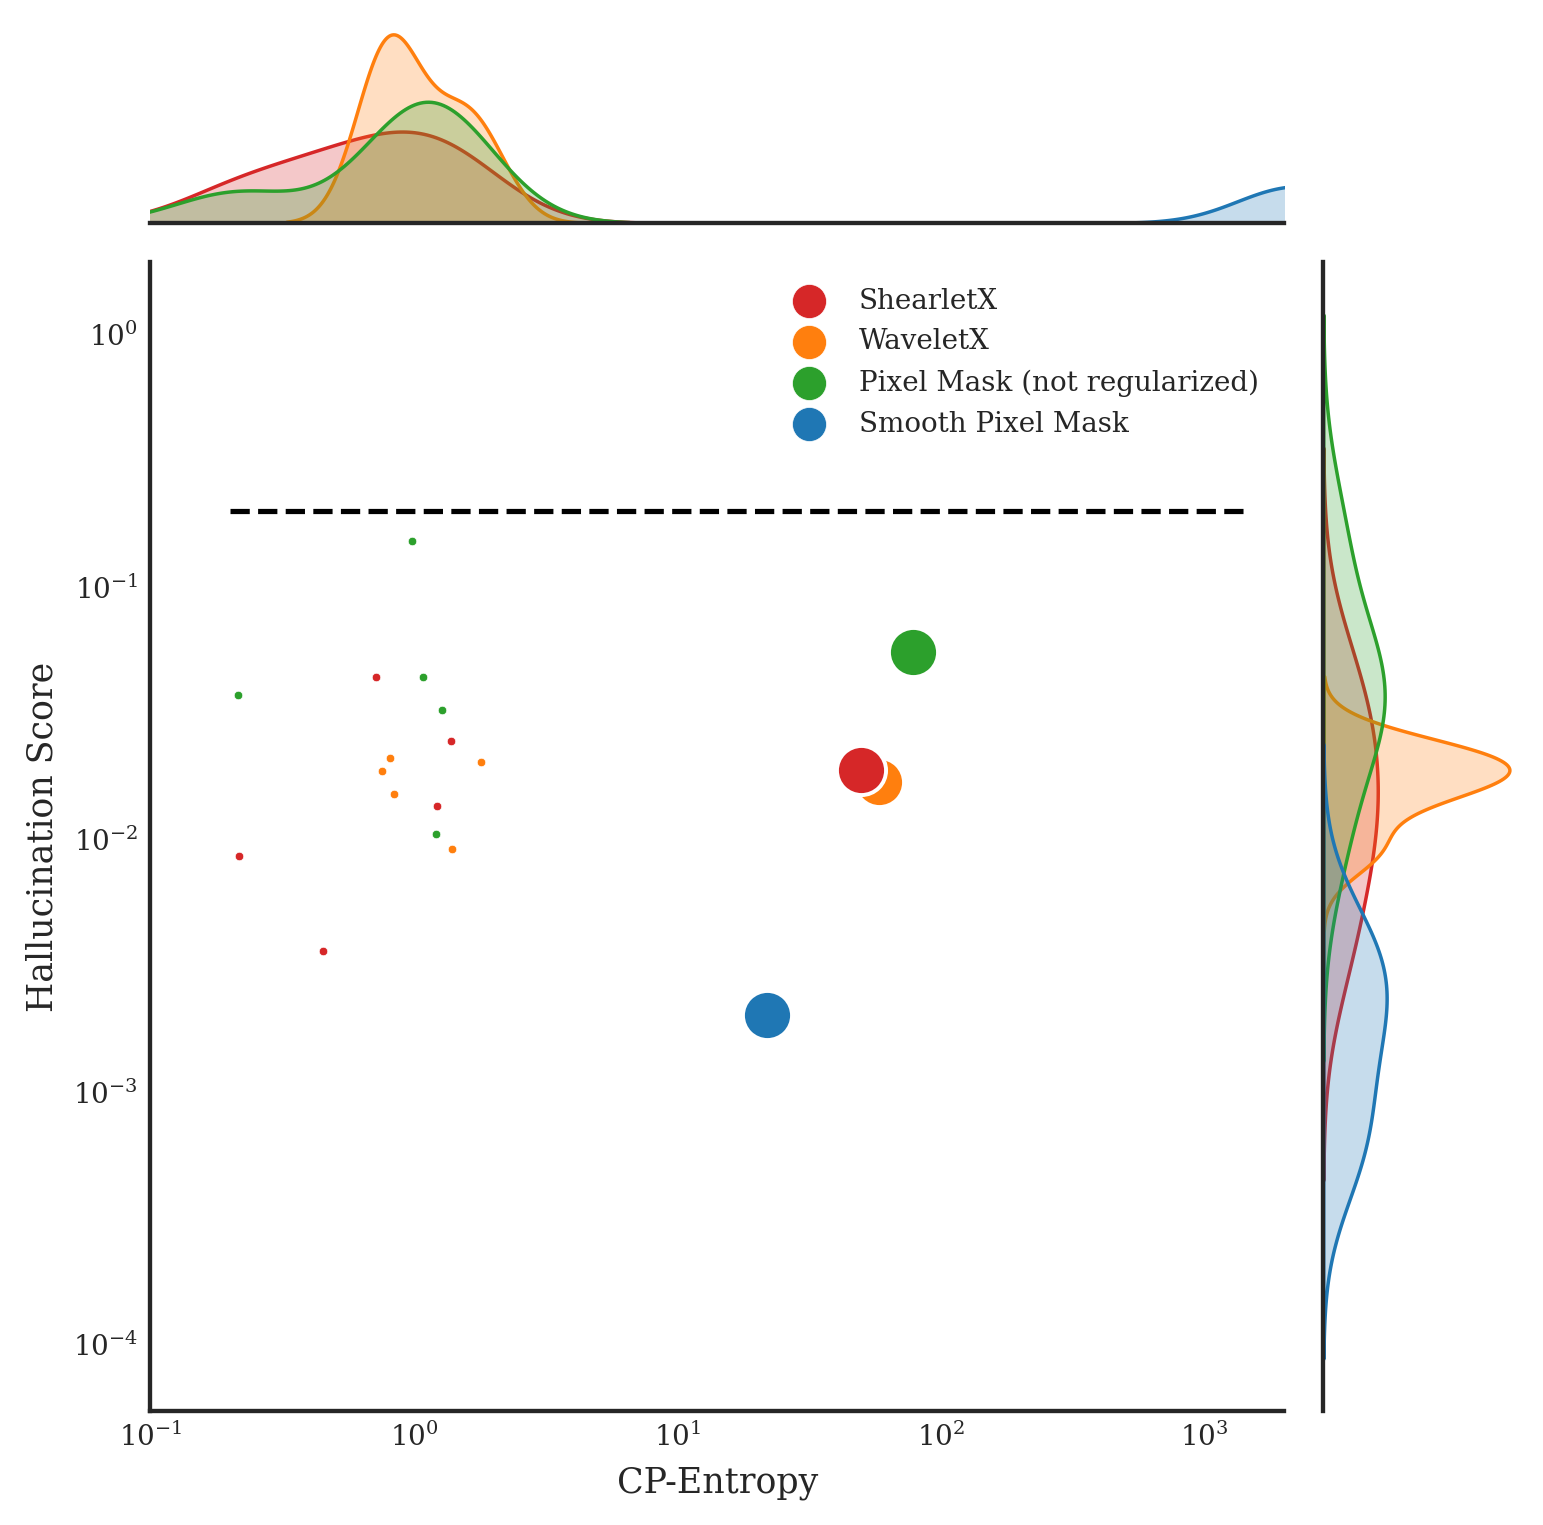

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


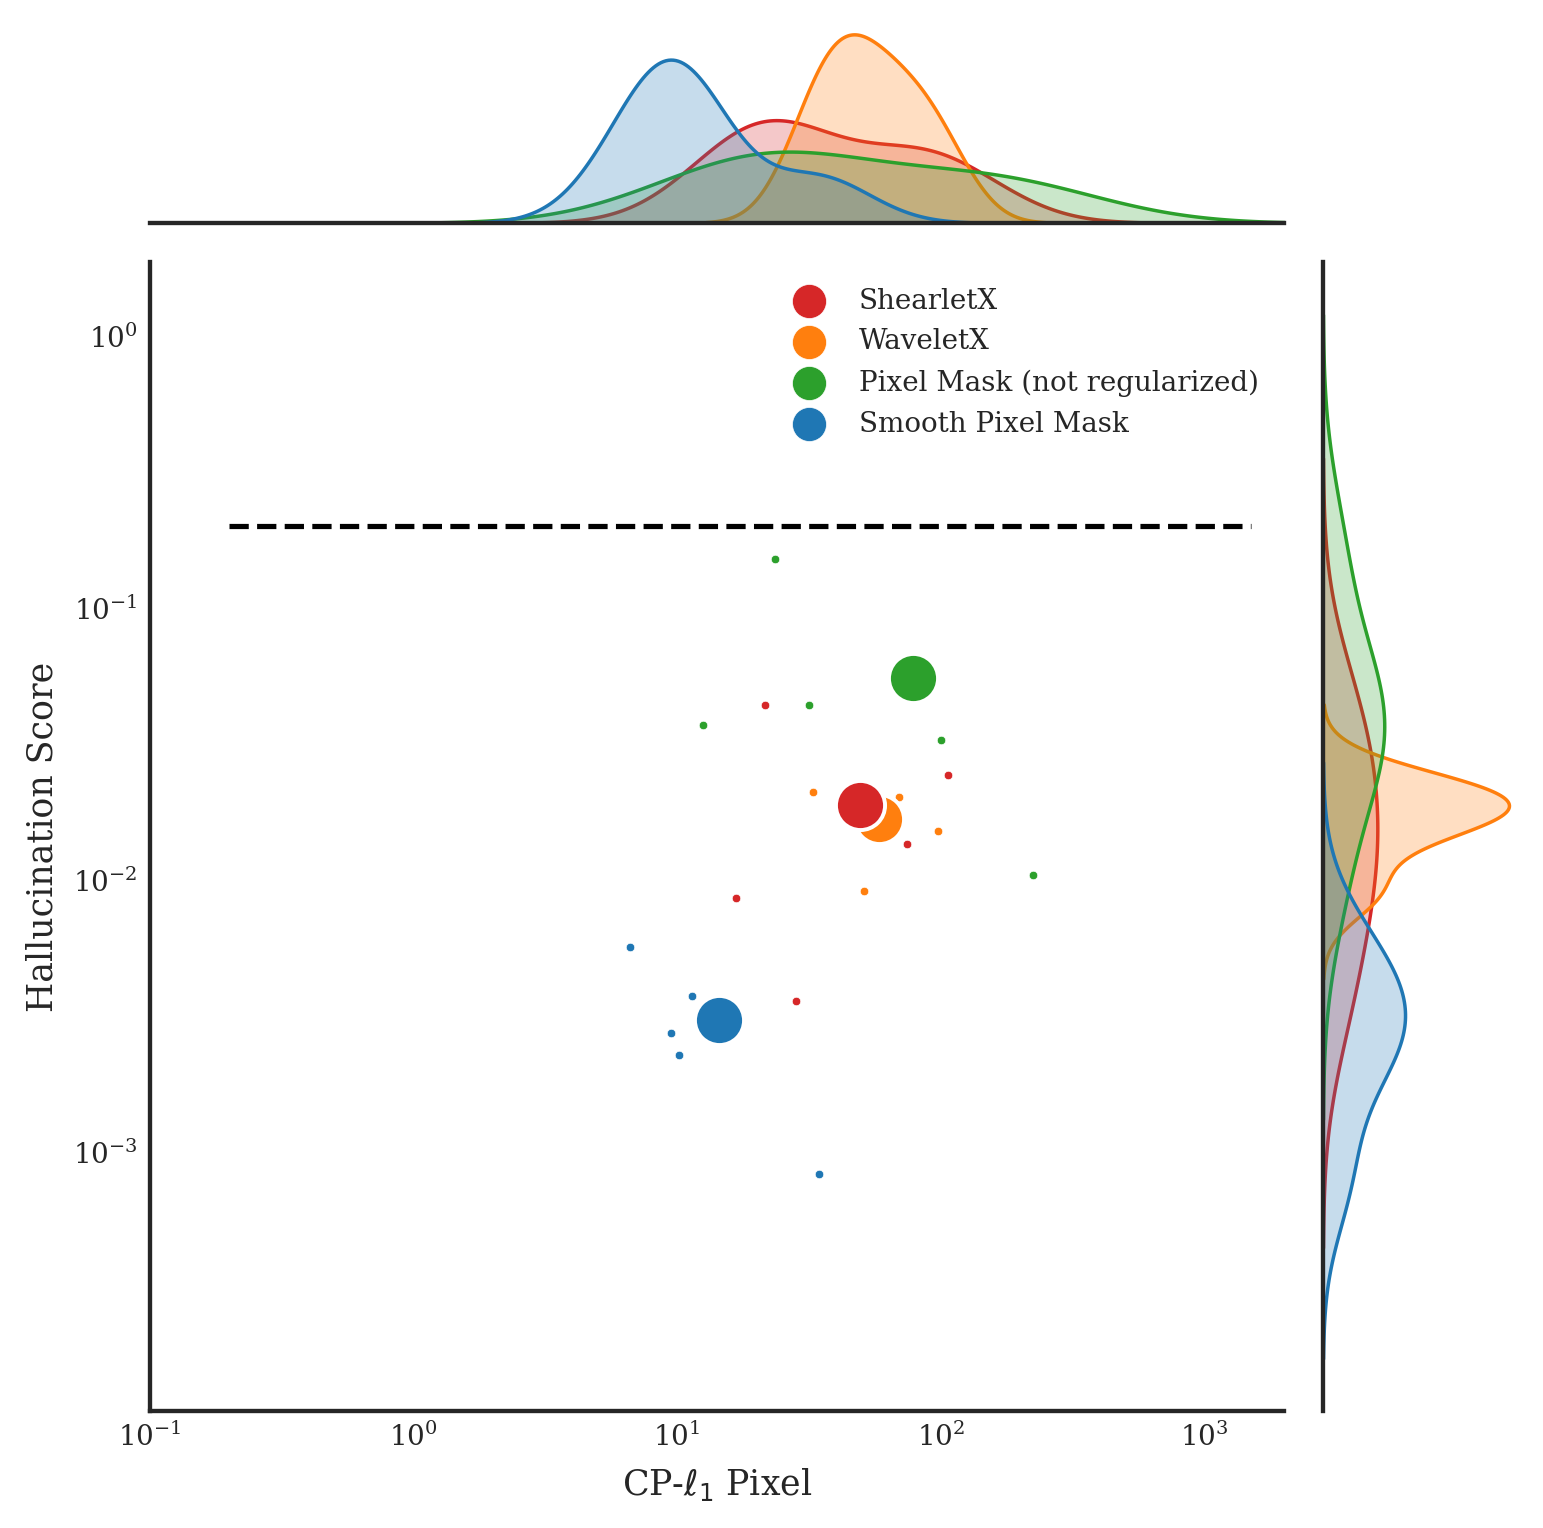

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


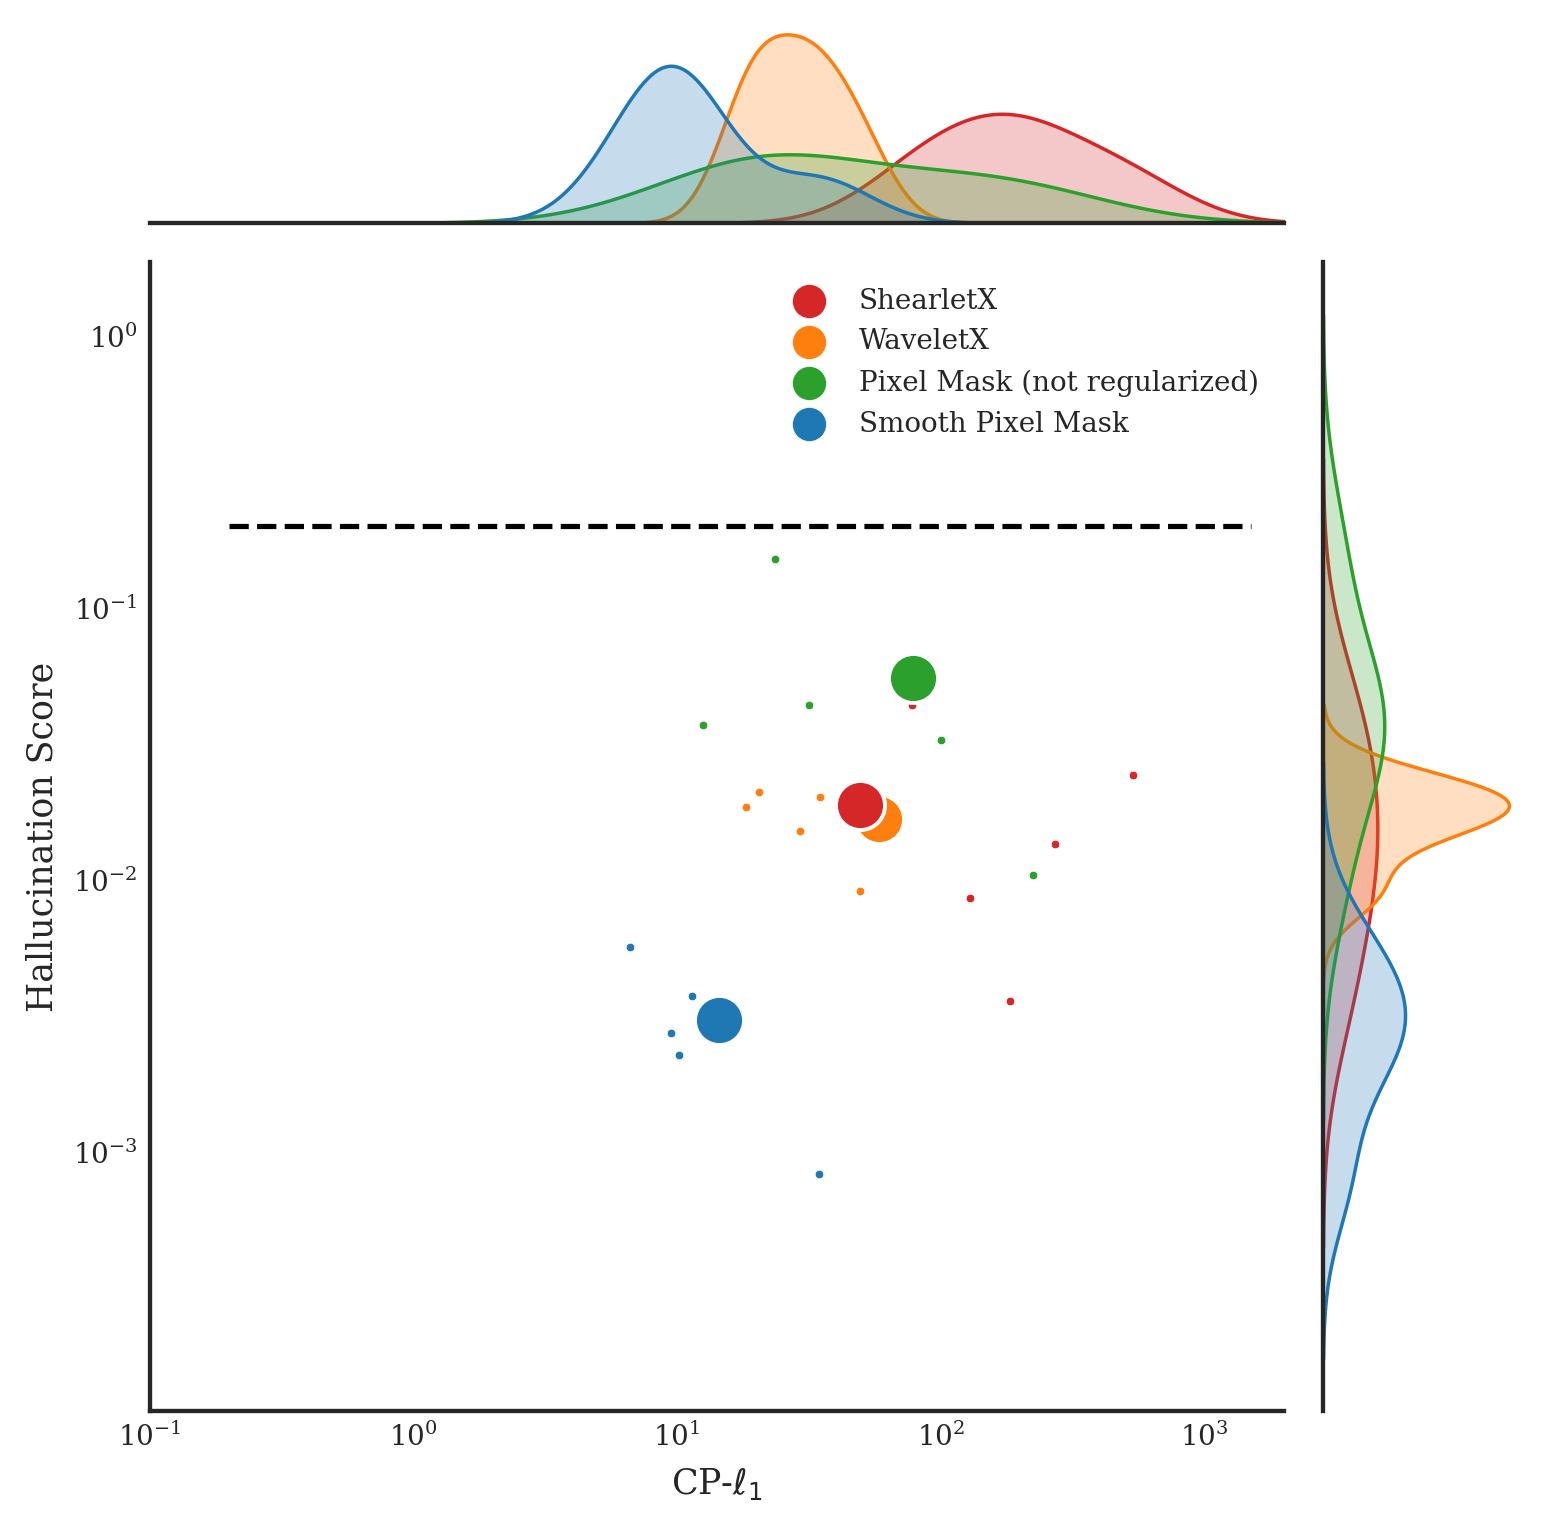

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


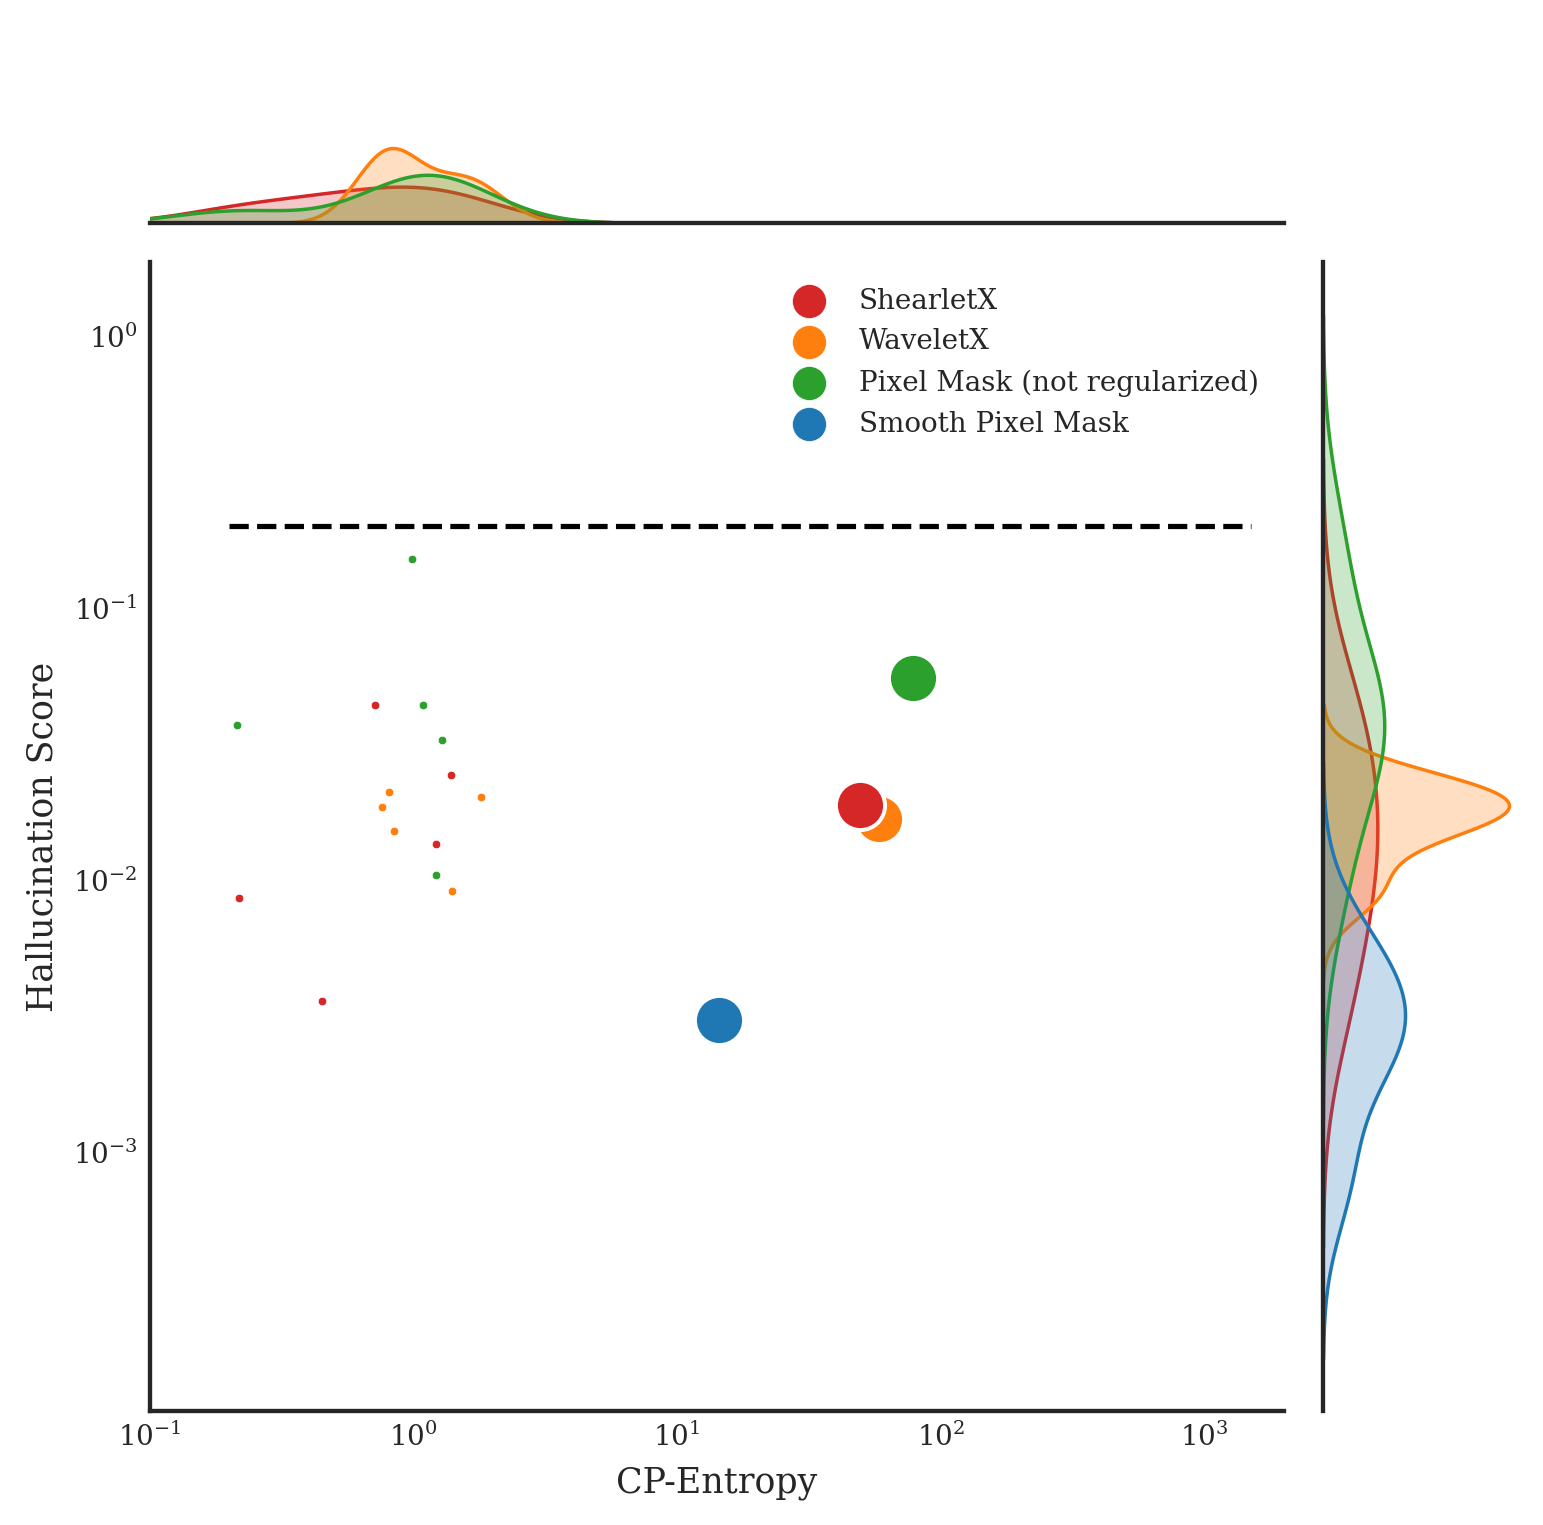

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


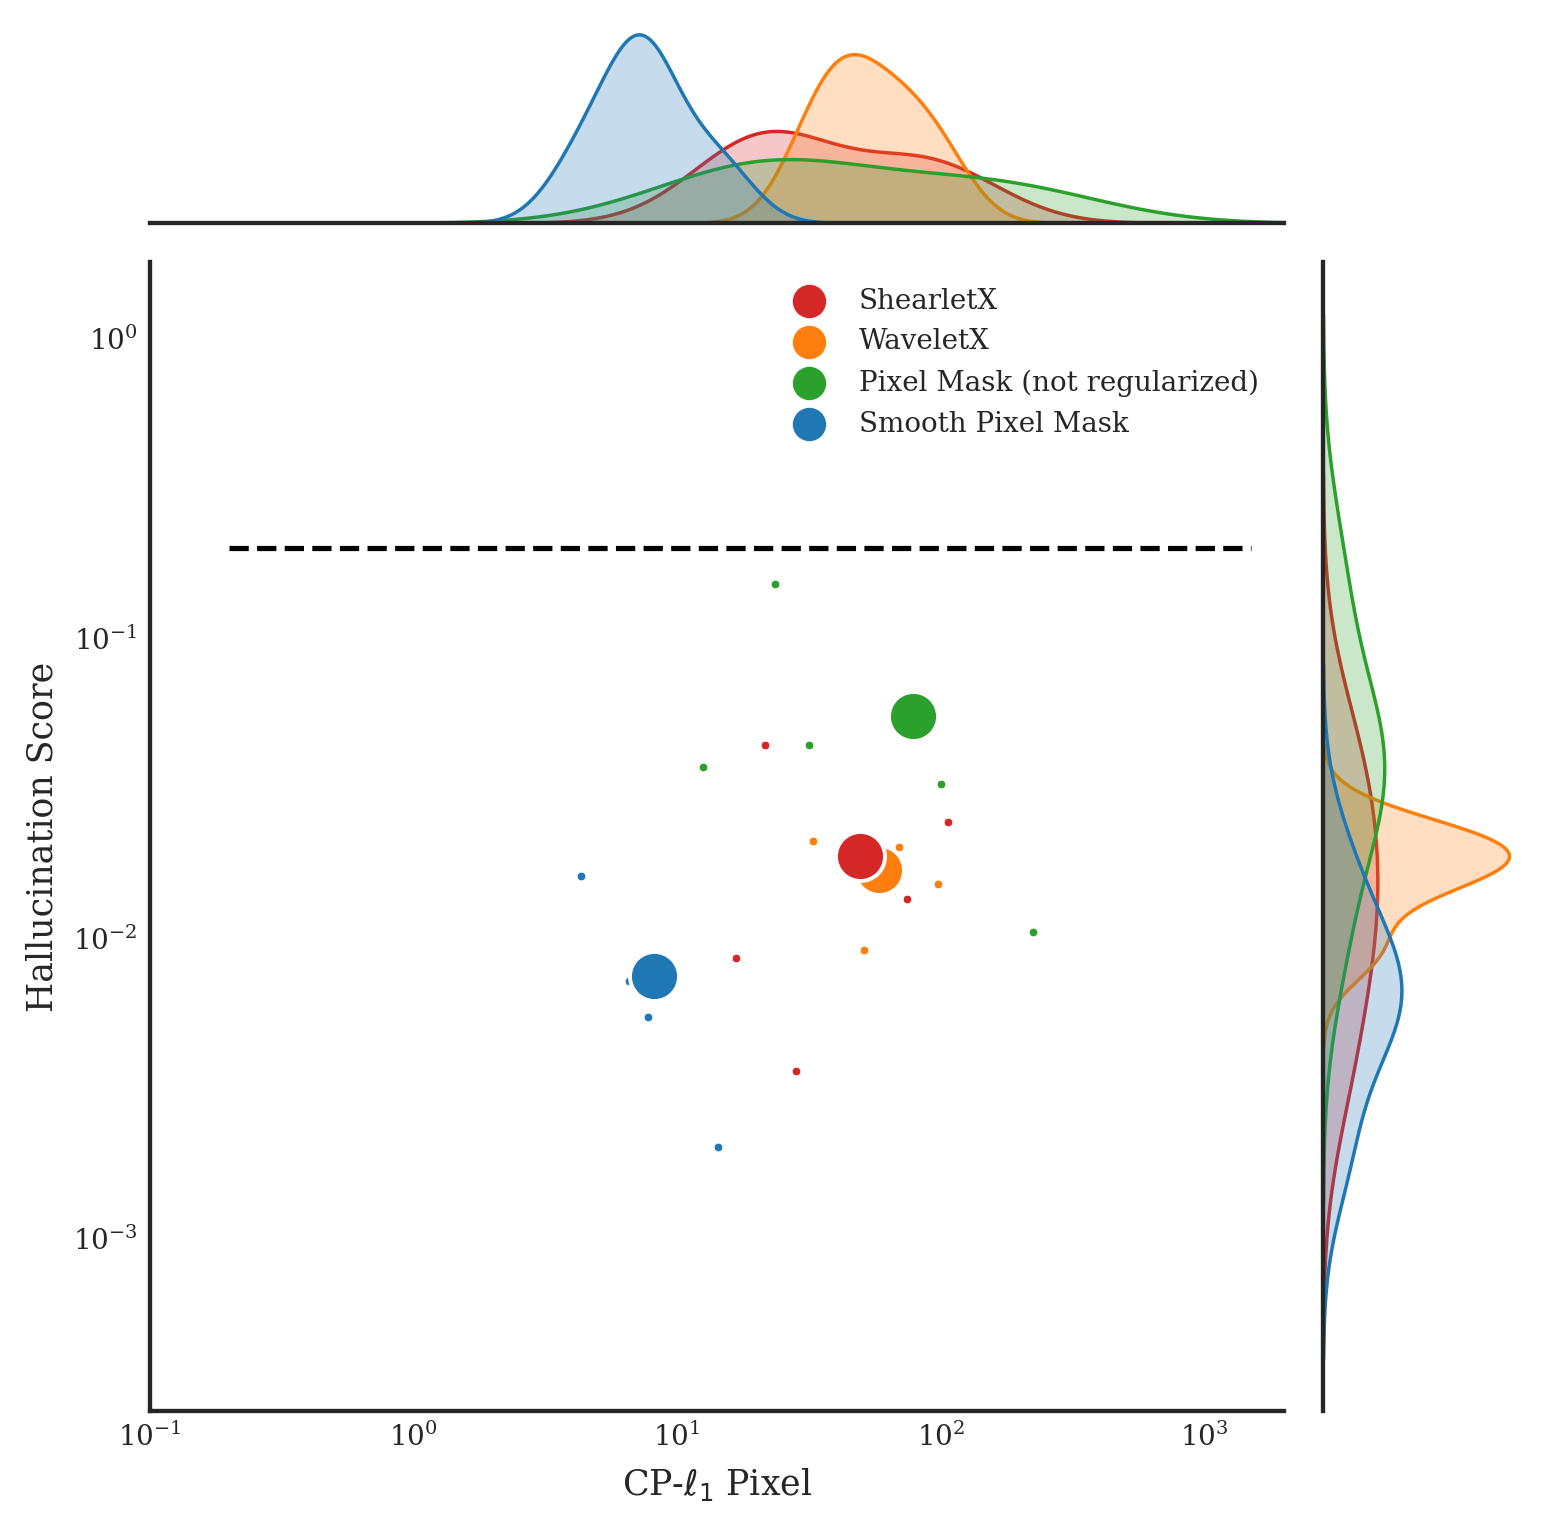

In [ ]:
s = 6
fontsize_for_mean = 200
linewidth = 1
tol = 1e-10
alpha = 1.

for a in [0.05, 0.1, 0.2]: # loop over different area constraints a
    if a == 0.05:
        a_idx = 0
    elif a == 0.1:
        a_idx = 1
    elif a == 0.2:
        a_idx = 2
    for information_measure in ['l1_spatial', 'l1_rep', 'entropy_rep']:
        if information_measure=='l1_spatial':
            masked_information_measure = 'l1_masked_spatial'
            img_information_measure = 'l1_img_spatial'
            xlabel = 'CP-$\ell_1$ Pixel'
        elif information_measure=='l1_rep':
            masked_information_measure = 'l1_masked_representation'
            img_information_measure = 'l1_img_representation'
            xlabel = 'CP-$\ell_1$'
        elif information_measure=='entropy_rep':
            masked_information_measure = 'entropy_masked_representation'
            img_information_measure = 'entropy_img_representation'
            xlabel = 'CP-Entropy'
        g = sns.JointGrid()
            
        # Plot ShearletX
        data = data_shearletx[0]
        x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data[masked_information_measure]) / np.array(data[img_information_measure]))
        sns.scatterplot(x=x, y=tol+np.array(data['hallu-score']), ax=g.ax_joint, color='tab:red', label='ShearletX',  s=s, alpha=alpha)
        sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:red', common_norm=False, log_scale=True)
        sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:red', common_norm=False, log_scale=True)


        # Plot WaveletX
        data = data_waveletx[0]
        x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data[masked_information_measure]) / np.array(data[img_information_measure]))
        sns.scatterplot(x=x, y=tol+np.array(data['hallu-score']), label='WaveletX', color='tab:orange', ax=g.ax_joint,  s=s, alpha=alpha)
        sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:orange', common_norm=False, log_scale=True)
        sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:orange', common_norm=False, log_scale=True)


        # Plot pixelmask
        data = data_pixelmask[0]
        x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data[masked_information_measure]) / np.array(data[img_information_measure]))
        sns.scatterplot(x=x, y=tol+np.array(data['hallu-score']), label='Pixel Mask (not regularized)', color='tab:green', ax=g.ax_joint, s=s, alpha=alpha)
        sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:green', common_norm=False, log_scale=True)
        sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:green', common_norm=False, log_scale=True)


        # Plot Smooth mask
        data = data_smoothmask[a_idx]
        a = data['hparams']['a']
        x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data[masked_information_measure]) / np.array(data['l1_img_spatial']))
        sns.scatterplot(x=x, y=np.array(data['hallu-score']), label=f'Smooth Pixel Mask', color='tab:blue', ax=g.ax_joint, s=s, alpha=alpha)
        sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:blue', common_norm=False, log_scale=True)
        sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:blue', common_norm=False, log_scale=True)


        # Plot means 
        for data, color in zip([data_smoothmask[a_idx], data_pixelmask[0], data_waveletx[0], data_shearletx[0]],['tab:blue', 'tab:green', 'tab:orange','tab:red']):
            x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_spatial']) / np.array(data['l1_img_spatial']))
            x_mean = x.mean()
            y_mean = np.array(data['hallu-score']).mean()
            sns.scatterplot(x=[x_mean], y=[y_mean],
                              color=color, ax=g.ax_joint,  s=fontsize_for_mean, alpha=1)


        ax = g.ax_joint
        ax.set_xscale('log')
        ax.set_yscale('log')
        g.ax_marg_x.set_xscale('log')
        g.ax_marg_y.set_yscale('log')

        
        ax.set_xlabel(xlabel)
        ax.set_ylabel('Hallucination Score')

        ax.set_xlim(0.1,2000)
        ax.plot([0.2, 1500], [0.2, 0.2], '--',color='black')

        ax.legend(markerscale=4)

        plt.legend(loc='upper right')
        #plt.savefig(f'figures/scatterplot_{net_name}_info_as_{img_information_measure}_area_{a}.pdf',bbox_inches='tight',pad_inches = 0)
        plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


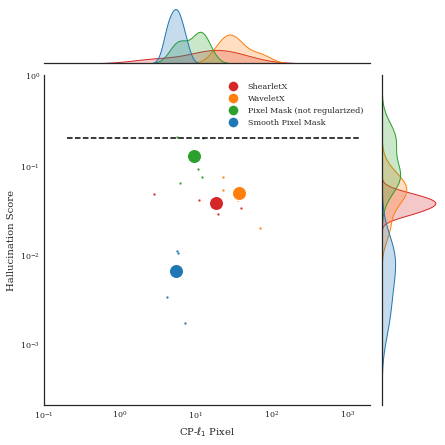

In [7]:
            
s = 6
fontsize_for_mean = 200
linewidth = 1
tol = 1e-10
alpha = 1.

# Plot ShearletX
data = data_shearletx[0]
x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_spatial']) / np.array(data['l1_img_spatial']))

g = sns.JointGrid()
sns.scatterplot(x=x, y=tol+np.array(data['hallu-score']), ax=g.ax_joint, color='tab:red', label='ShearletX',  s=s, alpha=alpha)
sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:red', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:red', common_norm=False, log_scale=True)


# Plot WaveletX
data = data_waveletx[0]
x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_spatial']) / np.array(data['l1_img_spatial']))

sns.scatterplot(x=x, y=tol+np.array(data['hallu-score']), label='WaveletX',
                  color='tab:orange', ax=g.ax_joint,  s=s, alpha=alpha)
sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:orange', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:orange', common_norm=False, log_scale=True)


# Plot pixelmask
data = data_pixelmask[0]
x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_spatial']) / np.array(data['l1_img_spatial']))

sns.scatterplot(x=x, y=tol+np.array(data['hallu-score']), label='Pixel Mask (not regularized)',
                  color='tab:green', ax=g.ax_joint, s=s, alpha=alpha)
sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:green', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:green', common_norm=False, log_scale=True)


# Plot Smooth mask
data = data_smoothmask[a_idx]
a = data['hparams']['a']
x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_spatial']) / np.array(data['l1_img_spatial']))

sns.scatterplot(x=x, y=np.array(data['hallu-score']), label=f'Smooth Pixel Mask', color='tab:blue', ax=g.ax_joint, s=s, alpha=alpha)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:blue', common_norm=False, log_scale=True)
sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:blue', common_norm=False, log_scale=True)


# Plot means 
for data, color in zip([data_smoothmask[a_idx], data_pixelmask[0], data_waveletx[0], data_shearletx[0]],['tab:blue', 'tab:green', 'tab:orange','tab:red']):
    x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_spatial']) / np.array(data['l1_img_spatial']))
    x_mean = x.mean()
    y_mean = np.array(data['hallu-score']).mean()
    sns.scatterplot(x=[x_mean], y=[y_mean],
                      color=color, ax=g.ax_joint,  s=fontsize_for_mean, alpha=1)


ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')


ax.set_xlabel('CP-$\ell_1$ Pixel')
ax.set_ylabel('Hallucination Score')

ax.set_xlim(0.1,2000)
ax.plot([0.2, 1500], [0.2, 0.2], '--',color='black')

ax.legend(markerscale=4)

plt.legend(loc='upper right')
plt.savefig(f'scatterplot_{net_name}_info_as_l1_spatial_area_{a}.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

### Entropy in Representation

ShearletX
Avg % Retained Probability: 49.282
Avg % Retained (Entropy Representation) Information : 7.594
WaveletX
Avg % Retained Probability: 101.472
Avg % Retained (Entropy Representation) Information : 326.990


NameError: name 'data_pixelrde' is not defined

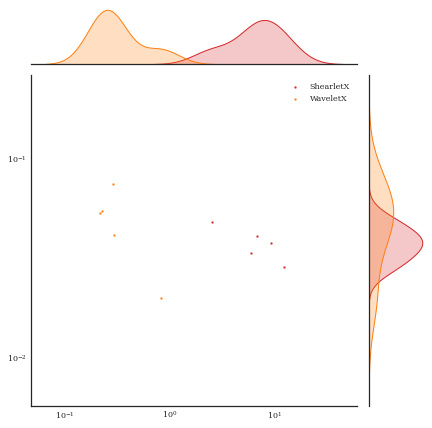

In [8]:
s = 6
mean_s = 200
linewidth = 1
tol = 1e-10
alpha = 1.


data = data_shearletx[0]
assert data['hparams']['l1lambda']==1, data['hparams']['l1lambda']
assert data['hparams']['l1_reg']==2, data['hparams']['l1_reg']

x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation']))

#x = 1/x

g = sns.JointGrid()
sns.scatterplot(x=x, y=np.array(data['hallu-score']), ax=g.ax_joint, color='tab:red', label='ShearletX',  s=s, alpha=alpha)
sns.kdeplot(y=np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:red', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:red', common_norm=False, log_scale=True)


print('ShearletX')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation'])).mean()
print(f'Avg % Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (Entropy Representation) Information : {(100*avg_info_retained):.3f}')




data = data_cartoonx[0]
assert data['hparams']['l1lambda']==2, data['hparams']['l1lambda']
assert data['hparams']['l1_reg']==10, data['hparams']['l1_reg']

x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation']))

#x = 1/x

sns.scatterplot(x=x, y=np.array(data['hallu-score']), label='WaveletX',
                  color='tab:orange', ax=g.ax_joint,  s=s, alpha=alpha)
sns.kdeplot(y=np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:orange', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:orange', common_norm=False, log_scale=True)

print('WaveletX')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation'])).mean()
print(f'Avg % Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (Entropy Representation) Information : {(100*avg_info_retained):.3f}')




# Plot pixelrde
data = data_pixelrde[0]
assert data['hparams']['l1lambda']==1, data['hparams']['l1lambda']
assert data['hparams']['tv_reg']==0, data['hparams']['tv_reg']


x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation']))

#x = 1/x

sns.scatterplot(x=x, y=np.array(data['hallu-score']), label='Pixel Mask (not regularized)',
                  color='tab:green', ax=g.ax_joint, s=s, alpha=alpha)
sns.kdeplot(y=np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:green', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:green', common_norm=False, log_scale=True)



print('Pixel Mask (not regularized)')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation'])).mean()
print(f'Avg % Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (Entropy Representation) Information : {(100*avg_info_retained):.3f}')







# Plot Smooth mask
data = data_smoothmask[a_idx]
assert data['hparams']['a']==a, data['hparams']['l1lambda']
a = data['hparams']['a']

#x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation']))
x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation']))
#x = 1/x

sns.scatterplot(x=x, y=np.array(data['hallu-score']), label=f'Smooth Pixel Mask', color='tab:blue', ax=g.ax_joint, s=s, alpha=alpha)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:blue', common_norm=False, log_scale=True)
sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:blue', common_norm=False, log_scale=True)

print('Smooth Pixel Mask')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation'])).mean()
print(f'Avg % Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (Entropy Representation) Information : {(100*avg_info_retained):.3f}')



# Plot means 
for data, color in zip([data_smoothmask[a_idx], data_pixelrde[0], data_cartoonx[0], data_shearletx[0]],['tab:blue', 'tab:green', 'tab:orange','tab:red']):
    x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / np.exp(np.array(data['entropy_masked_representation']) - np.array(data['entropy_img_representation']))
    x_mean = x.mean()
    y_mean = np.array(data['hallu-score']).mean()
    sns.scatterplot(x=[x_mean], y=[y_mean],
                      color=color, ax=g.ax_joint,  s=fontsize_for_mean, alpha=1)


ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim(0,2000)
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')


ax.set_xlabel('CP-Entropy')
ax.set_ylabel('Hallucination Score')

#ax.set_xlim(0.01,2000)
ax.plot([0.02, 1000], [0.2, 0.2], '--',color='black')

"""
x = np.arange(-1, 5, 0.1)
print(ax)
ax.plot(10**x, 10**(1-x), color='black')
"""

ax.legend(markerscale=4)
plt.legend(loc='upper right')
plt.savefig(f'scatterplot_{net_name}_info_as_entropy_in_representation_area_{a}.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()

ShearletX
Avg Retained Probability: 49.282
Avg % Retained (L1Representation) Information: 0.344%
WaveletX
Avg Retained Probability: 101.472
Avg % Retained (L1Representation) Information: 5.601%


NameError: name 'data_pixelrde' is not defined

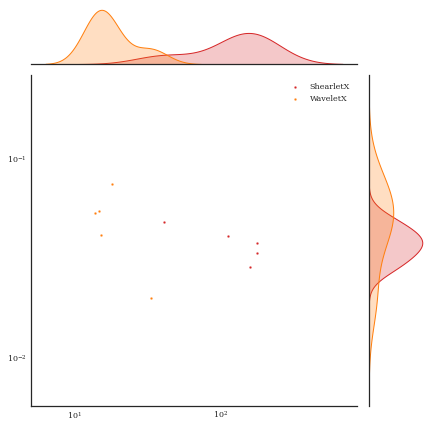

In [ ]:
s = 6
linewidth = 1
tol = 1e-10
alpha = 1.

data = data_shearletx[0]
assert data['hparams']['l1lambda']==1, data['hparams']['l1lambda']
assert data['hparams']['l1_reg']==2, data['hparams']['l1_reg']

x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation']))
#x = 1/x

g = sns.JointGrid()
sns.scatterplot(x=x, y=np.array(data['hallu-score']), ax=g.ax_joint, color='tab:red', label='ShearletX',  s=s, alpha=alpha)
sns.kdeplot(y=np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:red', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:red', common_norm=False, log_scale=True)


print('ShearletX')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation'])).mean()
print(f'Avg Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (L1Representation) Information: {(100*avg_info_retained):.3f}%')



data = data_cartoonx[0]
assert data['hparams']['l1lambda']==2, data['hparams']['l1lambda']
assert data['hparams']['l1_reg']==10, data['hparams']['l1_reg']

x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation']))
#x = 1/x

sns.scatterplot(x=x, y=np.array(data['hallu-score']), label='WaveletX',
                  color='tab:orange', ax=g.ax_joint,  s=s, alpha=alpha)
sns.kdeplot(y=np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:orange', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:orange', common_norm=False, log_scale=True)

print('WaveletX')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation'])).mean()
print(f'Avg Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (L1Representation) Information: {(100*avg_info_retained):.3f}%')



# Plot pixelrde
data = data_pixelrde[0]
assert data['hparams']['l1lambda']==1, data['hparams']['l1lambda']
assert data['hparams']['tv_reg']==0, data['hparams']['tv_reg']


x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation']))
#x = 1/x

sns.scatterplot(x=x, y=np.array(data['hallu-score']), label='Pixel Mask (not regularized)',
                  color='tab:green', ax=g.ax_joint, s=s, alpha=alpha)
sns.kdeplot(y=np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:green', common_norm=False, log_scale=True)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:green', common_norm=False, log_scale=True)



print('Pixel Mask (not regularized)')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation'])).mean()
print(f'Avg Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (L1Representation) Information: {(100*avg_info_retained):.3f}%')




# Plot Smooth mask
data = data_smoothmask[a_idx]
assert data['hparams']['a']==a, data['hparams']['l1lambda']
a = data['hparams']['a']

x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation']))
#x = 1/x

sns.scatterplot(x=x, y=np.array(data['hallu-score']), label=f'Smooth Pixel Mask', color='tab:blue', ax=g.ax_joint, s=s, alpha=alpha)
sns.kdeplot(x=x, linewidth=linewidth, ax=g.ax_marg_x, fill=True, color='tab:blue', common_norm=False, log_scale=True)
sns.kdeplot(y=tol+np.array(data['hallu-score']), linewidth=linewidth, ax=g.ax_marg_y, fill=True, color='tab:blue', common_norm=False, log_scale=True)

print('Smooth Pixel Mask')
avg_prob_retained = (np.array(data['fidelity']) / np.array(data['prob_img'])).mean()
avg_info_retained = (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation'])).mean()
print(f'Avg Retained Probability: {(100*avg_prob_retained):.3f}')
print(f'Avg % Retained (L1Representation) Information: {(100*avg_info_retained):.3f}%')


# Plot means 
for data, color in zip([data_smoothmask[a_idx], data_pixelrde[0], data_cartoonx[0], data_shearletx[0]],['tab:blue', 'tab:green', 'tab:orange','tab:red']):
    x = (np.array(data['fidelity']) / np.array(data['prob_img'])) / (np.array(data['l1_masked_representation']) / np.array(data['l1_img_representation']))
    x_mean = x.mean()
    y_mean = np.array(data['hallu-score']).mean()
    sns.scatterplot(x=[x_mean], y=[y_mean],
                      color=color, ax=g.ax_joint,  s=mean_s, alpha=1)




ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')



ax.set_xlabel('CP-$\ell_1$')
ax.set_ylabel('Hallucination Score')

#ax.set_xlim(0.1,10000)
ax.plot([0.2, 8000], [0.2, 0.2], '--',color='black')

ax.legend(markerscale=4)

plt.legend(loc='upper right')
#plt.suptitle('Retained information measured as normalized\n$\ell_1$-norm in respective representation.', y=1.07)
plt.savefig(f'scatterplot_{net_name}_info_as_l1_in_representation_area_{a}.pdf',bbox_inches='tight',pad_inches = 0)
plt.show()